# **Exercise 1**
Already answer quiz that are available on via canvas

# **Exercise 2**
Installing requirement libaries and its dependances.

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install tensorflow

# **Exercise 3**

Importing the California housing dataset and perform some basic data analysis on it to get a good understanding of the features. Steps are:

1. Importing the neccessary libaries:

In [ ]:
# Import necessary libraries for data manipulation, analysis, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing # For fetching the California housing dataset

2. Load the datset:

In [ ]:
# Load the Claifornia housing dataset
california_housing = fetch_california_housing() # Fetch the dataset

# Convert the dataset to a Pandas DataFrame
data = pd.DataFrame(data=np.c_[california_housing['data'],
california_housing['target']],
columns = california_housing['feature_names'] + ['target']) # Combine the data and target into a single DataFrame with appropriate column names


3. Quick check the data header and perform some basic statistic:


In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Summary statics of the numerical features
print(data.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%       

4. We can perform some basic regression analysis to understand the relation between different features:

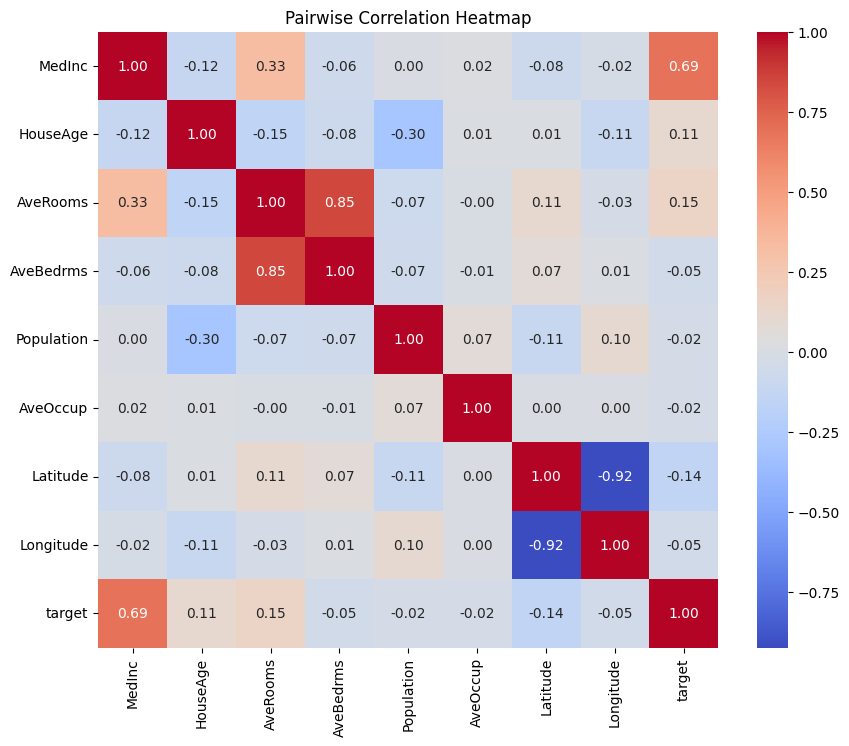

In [ ]:
# Pairwise correlation heatmap

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a figure with a specified size
plt.figure(figsize=(10, 8))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the heatmap
plt.title('Pairwise Correlation Heatmap')

# Display the heatmap
plt.show()


5. Understanding the target variable we can plot its histogram.
A histogram is a graphical representation that organizes a group of data points into user-specified ranges, showing the frequency distribution of a dataset.

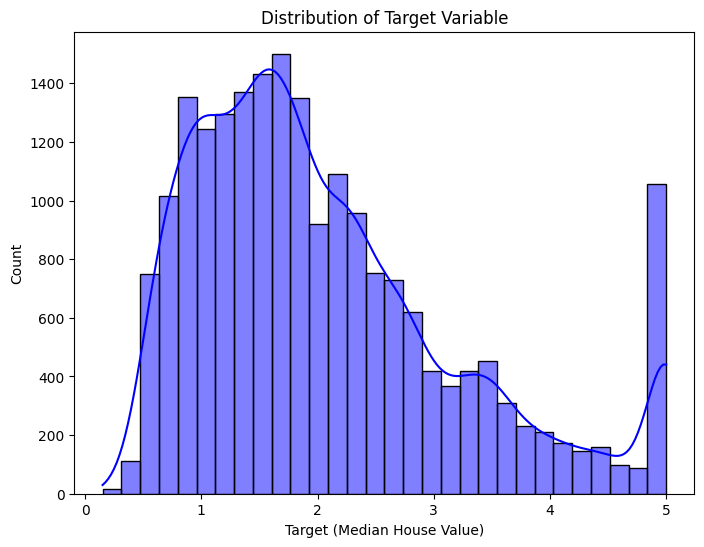

In [ ]:
# Distribution of the target variable

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Plot a histogram of the target variable with a kernel density estimate (KDE)
sns.histplot(data['target'], bins=30, kde=True, color='blue')

# Add a title to the plot
plt.title('Distribution of Target Variable')

# Label the x-axis
plt.xlabel('Target (Median House Value)')

# Display the plot
plt.show()

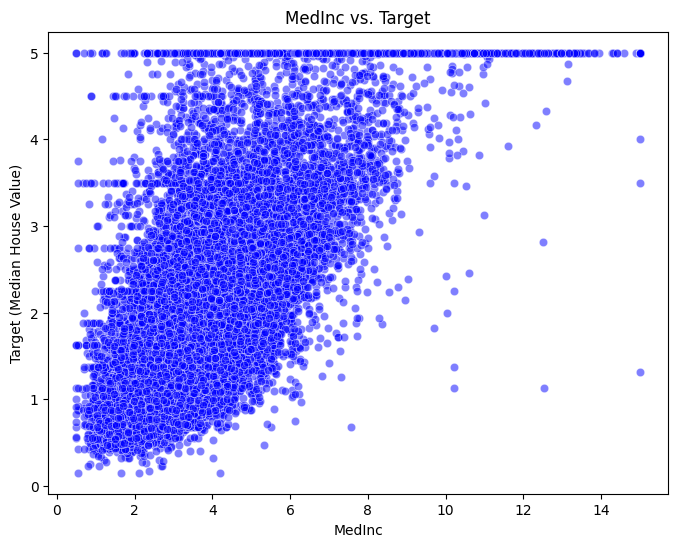

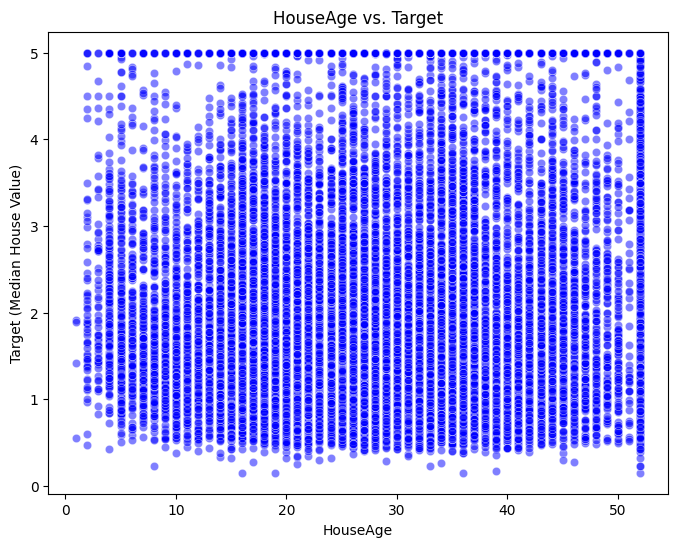

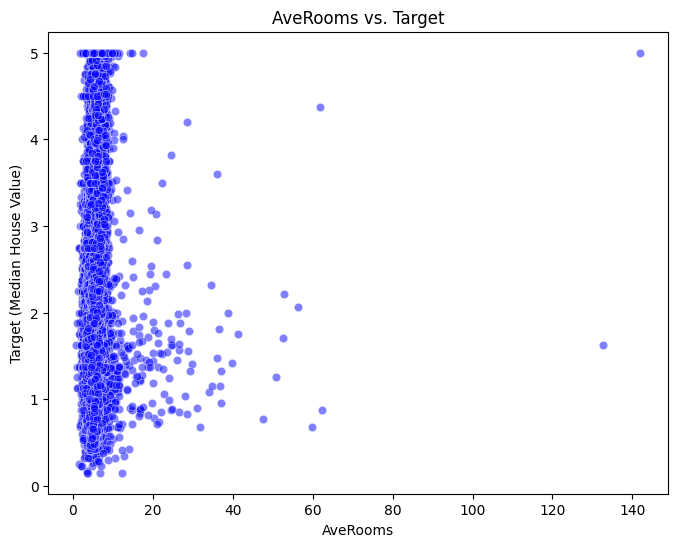

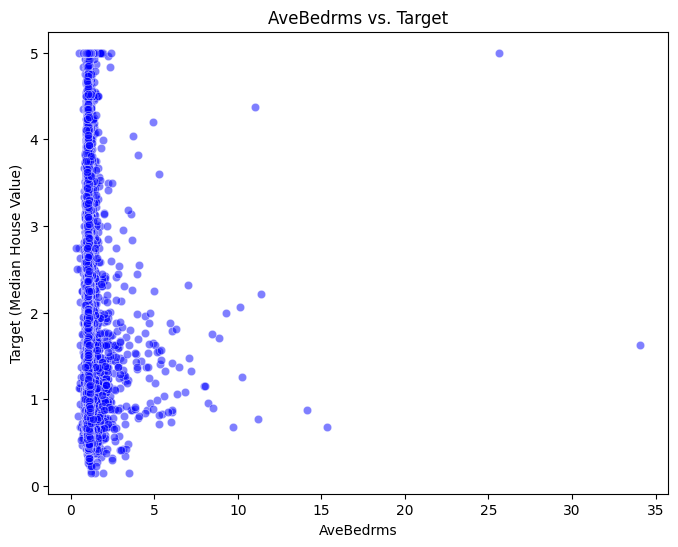

In [ ]:
# Scatter plot of selected features against the target variable

# Define the list of selected features
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']

# Loop through each feature in the selected features list
for feature in selected_features:
    # Create a figure with a specified size
    plt.figure(figsize=(8, 6))

    # Plot a scatter plot of the feature against the target variable
    sns.scatterplot(x=data[feature], y=data['target'], color='blue', alpha=0.5)

    # Add a title to the plot
    plt.title(f'{feature} vs. Target')

    # Label the x-axis with the feature name
    plt.xlabel(feature)

    # Label the y-axis
    plt.ylabel('Target (Median House Value)')

    # Display the plot
    plt.show()

# **Exercise 5**

In this task we will be using the simple ANN for the regression taks and comare its performance to the MLP model.

1. We will start by importing the libearies, It is worth noting here that we will be using the karas library.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

2. We will be using the same dataset(California housing one), but we need to split into train and test sets.

In [ ]:
# Load the California housing dataset
california_housing = fetch_california_housing()  # Fetch the dataset

# Convert the dataset to a Pandas DataFrame
data = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']],
                    columns=california_housing['feature_names'] + ['target'])  # Combine the data and target into a single DataFrame with appropriate column names

3. We will be using all the dataset features as an input and the house price as an output(target):

In [ ]:
# Select features and target variable
X = data.drop('target', axis=1)  # Drop the target column to get the feature matrix
y = data['target']  # Select the target variable

4. Split the dataset it into train and test sets and scale the trainin set. The following scirpt would split it into 80% train and 20% test which is determined by test_size = 0.2

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% testing

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Create a StandardScaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the testing data

5. Define the ANN model and compile it:


In [ ]:
# Build the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()  # Initialize a Sequential model
model.add(Dense(units=512, input_dim=X_train.shape[1], activation='relu'))  # Add a dense layer with ReLU activation
model.add(Dense(units=1, activation='linear'))  # Add a dense layer with linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model with Adam optimizer and mean squared error loss

6. Now our ANN is ready, and we can training it using the sacled training data:

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_test_scaled, y_test), verbose=1)  # Train the model for 100 epochs with a batch size of 128 and validate on the test set

Epoch 1/100
129/129 [==============================] - 2s 5ms/step - loss: 1.2122 - val_loss: 0.5978
Epoch 2/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4974 - val_loss: 0.4561
Epoch 3/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4225 - val_loss: 0.4118
Epoch 4/100
129/129 [==============================] - 1s 5ms/step - loss: 0.3935 - val_loss: 0.3956
Epoch 5/100
129/129 [==============================] - 1s 4ms/step - loss: 0.3820 - val_loss: 0.3852
Epoch 6/100
129/129 [==============================] - 1s 4ms/step - loss: 0.3741 - val_loss: 0.3815
Epoch 7/100
129/129 [==============================] - 1s 6ms/step - loss: 0.3686 - val_loss: 0.3702
Epoch 8/100
129/129 [==============================] - 1s 5ms/step - loss: 0.3934 - val_loss: 0.3653
Epoch 9/100
129/129 [==============================] - 1s 6ms/step - loss: 0.3615 - val_loss: 0.3607
Epoch 10/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3540 - val_lo

**# Exercise 6**

In this exercise we will be experimenting on different dataset size to assess the importance of collecting data for AI Model. To do so we will change the train test split to have 30.50% test split by changing the following:


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


Experiment with the split and record your results for 3 different splits:

Epoch 1/100
113/113 [==============================] - 1s 5ms/step - loss: 1.2738 - val_loss: 0.6208
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 0.5292 - val_loss: 0.4646
Epoch 3/100
113/113 [==============================] - 0s 4ms/step - loss: 0.4600 - val_loss: 0.4248
Epoch 4/100
113/113 [==============================] - 0s 4ms/step - loss: 0.4292 - val_loss: 0.4061
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4057 - val_loss: 0.3885
Epoch 6/100
113/113 [==============================] - 1s 5ms/step - loss: 0.3878 - val_loss: 0.3906
Epoch 7/100
113/113 [==============================] - 1s 6ms/step - loss: 0.3771 - val_loss: 0.3804
Epoch 8/100
113/113 [==============================] - 1s 7ms/step - loss: 0.3721 - val_loss: 0.3671
Epoch 9/100
113/113 [==============================] - 1s 6ms/step - loss: 0.3690 - val_loss: 0.3621
Epoch 10/100
113/113 [==============================] - 1s 5ms/step - loss: 0.3633 - val_lo

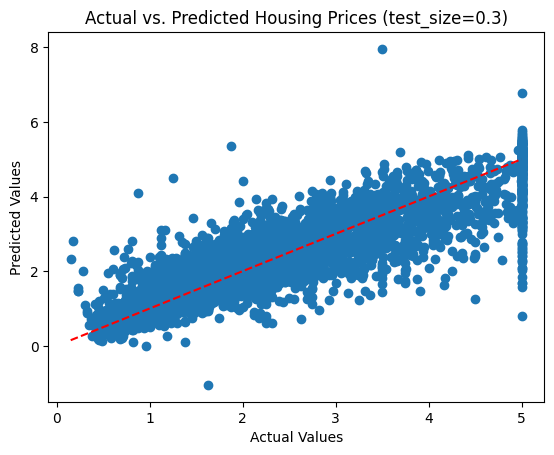

Epoch 1/100
97/97 [==============================] - 1s 6ms/step - loss: 1.4529 - val_loss: 0.6847
Epoch 2/100
97/97 [==============================] - 0s 4ms/step - loss: 0.5685 - val_loss: 0.5027
Epoch 3/100
97/97 [==============================] - 0s 4ms/step - loss: 0.4566 - val_loss: 0.4544
Epoch 4/100
97/97 [==============================] - 0s 5ms/step - loss: 0.4388 - val_loss: 0.4163
Epoch 5/100
97/97 [==============================] - 0s 4ms/step - loss: 0.3948 - val_loss: 0.4039
Epoch 6/100
97/97 [==============================] - 0s 4ms/step - loss: 0.3862 - val_loss: 0.4002
Epoch 7/100
97/97 [==============================] - 0s 4ms/step - loss: 0.3789 - val_loss: 0.3911
Epoch 8/100
97/97 [==============================] - 0s 4ms/step - loss: 0.3721 - val_loss: 0.3892
Epoch 9/100
97/97 [==============================] - 0s 4ms/step - loss: 0.3700 - val_loss: 0.3798
Epoch 10/100
97/97 [==============================] - 0s 4ms/step - loss: 0.3641 - val_loss: 0.3803
Epoch 11/

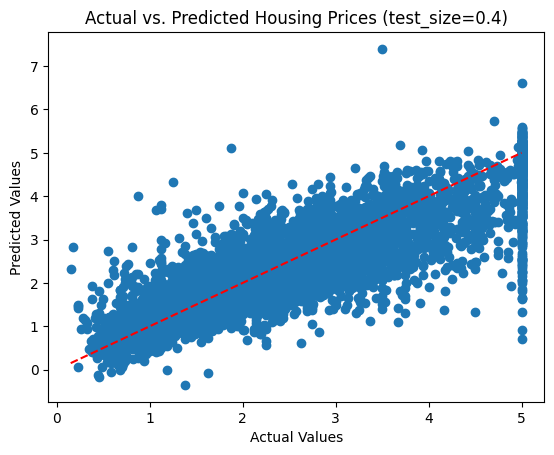

Epoch 1/100
81/81 [==============================] - 1s 7ms/step - loss: 1.5729 - val_loss: 0.7186
Epoch 2/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6262 - val_loss: 0.5476
Epoch 3/100
81/81 [==============================] - 0s 5ms/step - loss: 0.4949 - val_loss: 0.4671
Epoch 4/100
81/81 [==============================] - 0s 5ms/step - loss: 0.4444 - val_loss: 0.4320
Epoch 5/100
81/81 [==============================] - 0s 5ms/step - loss: 0.4165 - val_loss: 0.4132
Epoch 6/100
81/81 [==============================] - 0s 5ms/step - loss: 0.4004 - val_loss: 0.4043
Epoch 7/100
81/81 [==============================] - 0s 4ms/step - loss: 0.3922 - val_loss: 0.3989
Epoch 8/100
81/81 [==============================] - 0s 4ms/step - loss: 0.4147 - val_loss: 0.3905
Epoch 9/100
81/81 [==============================] - 0s 4ms/step - loss: 0.3863 - val_loss: 0.3856
Epoch 10/100
81/81 [==============================] - 0s 4ms/step - loss: 0.3814 - val_loss: 0.3882
Epoch 11/

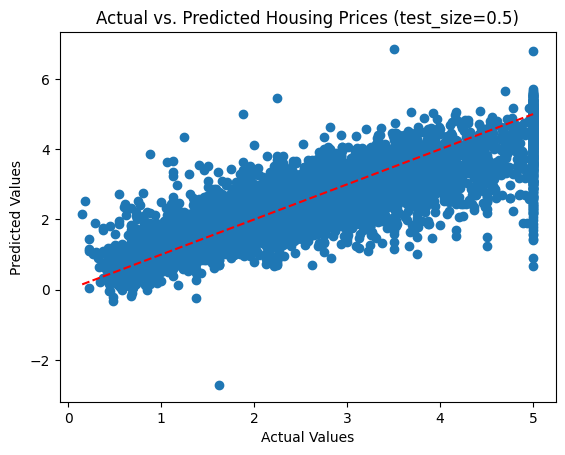

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']],
                    columns=california_housing['feature_names'] + ['target'])

# Select features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Function to train and evaluate the model
def train_and_evaluate(X, y, test_size):
    # Split the dataset into training and testing sets with the given test_size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Standardize the features to have zero mean and unit variance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the neural network model
    model = Sequential()
    model.add(Dense(units=512, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with ReLU activation
    model.add(Dense(units=1, activation='linear'))  # Output layer with linear activation for regression

    # Compile the model with Adam optimizer and mean squared error loss function
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model on the training data and validate on the test data
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_test_scaled, y_test), verbose=1)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model by calculating the Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Root Mean Squared Error for test_size={test_size}: {rmse}")

    # Plot the actual vs. predicted values
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Reference line
    plt.scatter(y_test, y_pred)  # Scatter plot of actual vs. predicted values
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Housing Prices (test_size={test_size})')
    plt.show()

# Experiment with different splits
splits = [0.3, 0.4, 0.5]
for split in splits:
    train_and_evaluate(X, y, test_size=split)


# **Exercise 7:**
Updating the ANN model to have the 256, then 512, and finally 1024 units and observe and record the change in the prediction accuracy and the time taken to run the script:

Epoch 1/100
129/129 [==============================] - 2s 8ms/step - loss: 1.5269 - val_loss: 0.6914
Epoch 2/100
129/129 [==============================] - 1s 6ms/step - loss: 0.5859 - val_loss: 0.5386
Epoch 3/100
129/129 [==============================] - 1s 5ms/step - loss: 0.4698 - val_loss: 0.4504
Epoch 4/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4219 - val_loss: 0.4170
Epoch 5/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4012 - val_loss: 0.4302
Epoch 6/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3881 - val_loss: 0.3962
Epoch 7/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3824 - val_loss: 0.3863
Epoch 8/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3762 - val_loss: 0.3821
Epoch 9/100
129/129 [==============================] - 1s 6ms/step - loss: 0.3729 - val_loss: 0.3759
Epoch 10/100
129/129 [==============================] - 1s 4ms/step - loss: 0.3644 - val_lo

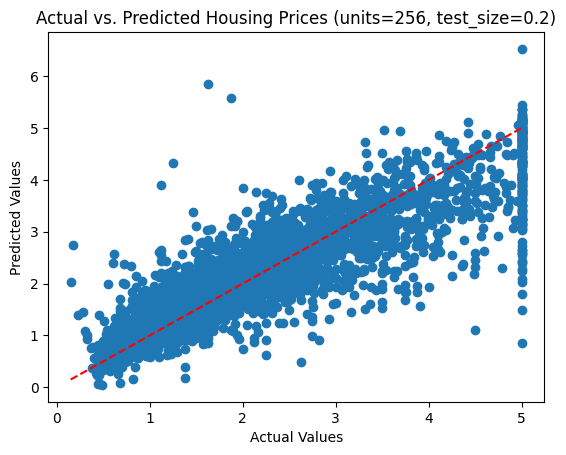

Epoch 1/100
129/129 [==============================] - 1s 6ms/step - loss: 1.2531 - val_loss: 0.6169
Epoch 2/100
129/129 [==============================] - 0s 3ms/step - loss: 0.5211 - val_loss: 0.4549
Epoch 3/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4259 - val_loss: 0.4155
Epoch 4/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3967 - val_loss: 0.3996
Epoch 5/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3848 - val_loss: 0.3930
Epoch 6/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3757 - val_loss: 0.3959
Epoch 7/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3680 - val_loss: 0.3713
Epoch 8/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3610 - val_loss: 0.3650
Epoch 9/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3627 - val_loss: 0.3653
Epoch 10/100
129/129 [==============================] - 0s 3ms/step - loss: 0.3459 - val_lo

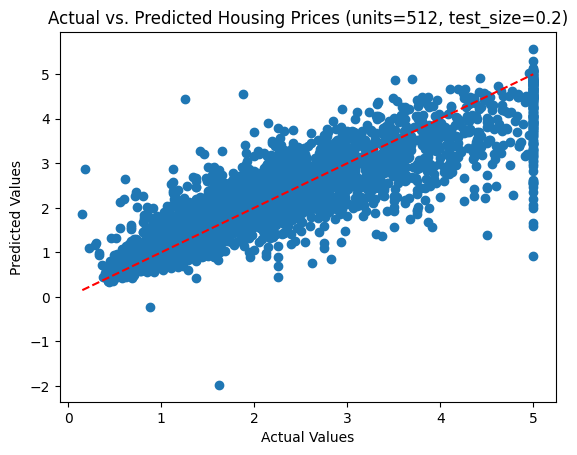

Epoch 1/100
129/129 [==============================] - 1s 5ms/step - loss: 1.0372 - val_loss: 0.5352
Epoch 2/100
129/129 [==============================] - 1s 4ms/step - loss: 0.4468 - val_loss: 0.4208
Epoch 3/100
129/129 [==============================] - 0s 3ms/step - loss: 0.4013 - val_loss: 0.4118
Epoch 4/100
129/129 [==============================] - 1s 4ms/step - loss: 0.4911 - val_loss: 0.3868
Epoch 5/100
129/129 [==============================] - 0s 4ms/step - loss: 0.3918 - val_loss: 0.3784
Epoch 6/100
129/129 [==============================] - 1s 4ms/step - loss: 0.3687 - val_loss: 0.3658
Epoch 7/100
129/129 [==============================] - 1s 4ms/step - loss: 0.3559 - val_loss: 0.3596
Epoch 8/100
129/129 [==============================] - 1s 7ms/step - loss: 0.3544 - val_loss: 0.3624
Epoch 9/100
129/129 [==============================] - 1s 7ms/step - loss: 0.3407 - val_loss: 0.3751
Epoch 10/100
129/129 [==============================] - 1s 7ms/step - loss: 0.3388 - val_lo

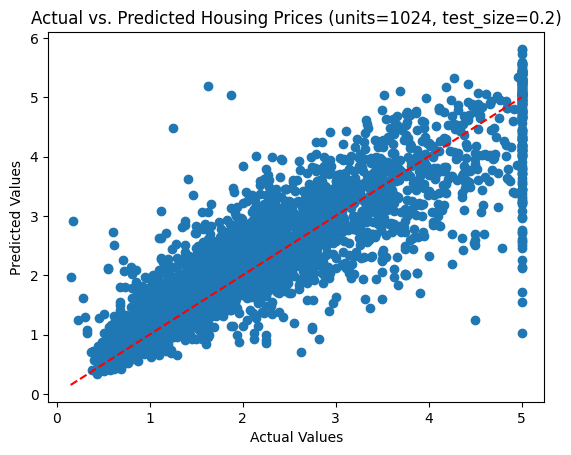

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']],
                    columns=california_housing['feature_names'] + ['target'])

# Select features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Function to train and evaluate the model with a specified number of units in the hidden layer
def train_and_evaluate(X, y, test_size, units):
    # Split the dataset into training and testing sets with the given test_size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the neural network model
    model = Sequential()
    model.add(Dense(units=units, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer
    model.add(Dense(units=1, activation='linear'))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model and measure the time taken
    start_time = time.time()
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_test_scaled, y_test), verbose=1)
    end_time = time.time()

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    training_time = end_time - start_time
    print(f"Units: {units} | Root Mean Squared Error: {rmse:.4f} | Training Time: {training_time:.2f} seconds")

    # Plot the results
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Reference line
    plt.scatter(y_test, y_pred)  # Scatter plot of actual vs. predicted values
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Housing Prices (units={units}, test_size={test_size})')
    plt.show()

# Experiment with different units and record results
units_list = [256, 512, 1024]
test_size = 0.2  # Fixed test size for all experiments
for units in units_list:
    train_and_evaluate(X, y, test_size, units)


# **Exercise 8**

In this part we will using MLP for classification

1. Import the libraries:

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

2. Generate the dataset and split it:

In [33]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Scale the training dataset:

In [34]:
# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. Define the MLP classifier:

In [35]:
# MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000,
random_state=42)

5. Train it:

In [36]:
# Train the MLP model
mlp_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

6. Use it for predicating:

In [37]:
# Make predictions on the test set
mlp_predictions = mlp_classifier.predict(X_test)

7. Evaluate its accuracy:

In [38]:
# Evaluate the MLP model
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("MLP Accuracy:", mlp_accuracy)

MLP Accuracy: 0.825


# **Exercise 9:**

Experiment with different sizes for hidden layer and compare them in terms of accuracy and training time:


In [39]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define different hidden layer sizes to experiment with
hidden_layer_sizes = [(5,), (10,), (50,), (100,), (200,)]
results = []

# Experiment with different hidden layer sizes
for size in hidden_layer_sizes:
    # Initialize the MLP classifier
    mlp_classifier = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=42)

    # Measure the training time
    start_time = time.time()
    mlp_classifier.fit(X_train, y_train)
    end_time = time.time()

    # Make predictions on the test set
    mlp_predictions = mlp_classifier.predict(X_test)

    # Evaluate the MLP model
    mlp_accuracy = accuracy_score(y_test, mlp_predictions)
    training_time = end_time - start_time

    # Store the results
    results.append((size, mlp_accuracy, training_time))

# Print the results
for size, accuracy, training_time in results:
    print(f"Hidden Layer Size: {size}, Accuracy: {accuracy:.4f}, Training Time: {training_time:.4f} seconds")


Hidden Layer Size: (5,), Accuracy: 0.8250, Training Time: 3.0683 seconds
Hidden Layer Size: (10,), Accuracy: 0.8700, Training Time: 2.9268 seconds
Hidden Layer Size: (50,), Accuracy: 0.8300, Training Time: 3.0939 seconds
Hidden Layer Size: (100,), Accuracy: 0.8150, Training Time: 2.9077 seconds
Hidden Layer Size: (200,), Accuracy: 0.8050, Training Time: 6.1067 seconds


# **Exercise 10**
In this exercise, we will use ANN for the classification

1. Import the ANN libaries:

In [40]:
from keras.models import Sequential
from keras.layers import Dense

2. Define the model and compile it:

In [41]:
# Create a simple ANN model
ann_model = Sequential()
ann_model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
# Compile the model
ann_model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])

3. Train the ANN for 10 epochs

In [42]:
# Train the ANN model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
25/25 [==============================] - 1s 2ms/step - loss: 0.5774 - accuracy: 0.7063
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.8275
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4032 - accuracy: 0.8525
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8675
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8775
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8825
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.8863
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8938
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8950
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.9013


4. Evaluate its accuracy

In [43]:
# Evaluate the ANN model
_, ann_accuracy = ann_model.evaluate(X_test, y_test)
print("ANN Accuracy:", ann_accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8400
ANN Accuracy: 0.8399999737739563


# **Exercise 11:**

Experiment with different unit numbers and compare them in terms of accuracy and training time.

In [53]:
import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the initial model
def create_initial_model():
    model = Sequential()

    # Adding the first hidden layer with 100 neurons and ReLU activation
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))

    # Adding the output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with binary crossentropy loss and Adam optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to create an extended model with additional hidden layers
def create_extended_model():
    model = Sequential()

    # Adding the first hidden layer with 100 neurons and ReLU activation
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))

    # Adding the second hidden layer with 50 neurons and ReLU activation
    model.add(Dense(50, activation='relu'))

    # Adding the third hidden layer with 25 neurons and ReLU activation
    model.add(Dense(25, activation='relu'))

    # Adding the output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with binary crossentropy loss and Adam optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate the initial model
initial_model = create_initial_model()

# Record the start time for training the initial model
start_time = time.time()

# Train the initial model with training data for 10 epochs
initial_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Calculate the training time for the initial model
initial_train_time = time.time() - start_time

# Evaluate the initial model with the test data
_, initial_accuracy = initial_model.evaluate(X_test, y_test)

# Train and evaluate the extended model
extended_model = create_extended_model()

# Record the start time for training the extended model
start_time = time.time()

# Train the extended model with training data for 10 epochs
extended_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Calculate the training time for the extended model
extended_train_time = time.time() - start_time

# Evaluate the extended model with the test data
_, extended_accuracy = extended_model.evaluate(X_test, y_test)

# Output results
print(f"Initial Model Accuracy: {initial_accuracy}, Training Time: {initial_train_time}")
print(f"Extended Model Accuracy: {extended_accuracy}, Training Time: {extended_train_time}")


Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.5549 - accuracy: 0.7188
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8400
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8675
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8825
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3298 - accuracy: 0.8863
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3134 - accuracy: 0.8888
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3017 - accuracy: 0.8925
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.8913
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2872 - accuracy: 0.8938
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3643 - accuracy: 0.8600
Epoch 1/10
25/25 [===